In [15]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb
import statistics

In [2]:
# get data from data base

os.chdir(str(Path("__file__").cwd()) + "/..")
os.getcwd()

'/Users/eric/Documents/SchoolCourses/PaGamO'

In [3]:
conn = duckdb.connect("/Users/eric/Documents/SchoolCourses/PaGamO/databases/experiment-logs/target_book_volume_log.parquet")
conn.sql("select * from target_book_volume_log").df()

,id,user_id,gamecharacter_id,question_id,section_id,experiment_index,is_correct,created_at_utc8
0,6293169630998722894,-2745250740480150807,8680778461573550965,-5702624661212032973,-247801341597882458,2,1,2025-04-23 08:08:22
1,463572211985359772,-5761667958602800058,521090650906562984,5786121490234329394,-247801341597882458,0,1,2025-04-23 08:26:05
2,-5837136070046364003,6115242510962495173,-6443793721336276038,5786121490234329394,-247801341597882458,2,1,2025-04-23 22:01:49
3,8215730594117806186,-1331010108845423507,1772485618758883370,5786121490234329394,-247801341597882458,3,0,2025-04-23 21:06:48
4,-2913225120035699376,1451927926610834855,3646380483119150987,5786121490234329394,-247801341597882458,3,0,2025-04-23 10:59:14
...,...,...,...,...,...,...,...,...
136697,-2200065588643711100,-7366248835920362615,-233942289291649591,1887145344529747750,7685579370828672563,3,0,2025-04-17 16:37:46
136698,-2329692266701742020,2510315349058269821,-1126924361851843305,-2339810603879002153,7685579370828672563,0,0,2025-04-17 23:08:43
136699,-2407948713648189597,2510315349058269821,-1126924361851843305,8526427049318443027,7685579370828672563,0,1,2025-04-17 23:10:49
136700,-6337134753102110057,-7366248835920362615,4273598908001877967,2798103913246151389,7685579370828672563,0,1,2025-04-17 16:10:01


In [4]:
print(os.getcwd())

conn = duckdb.connect("./data/raw/experiment-2025-q1/ntuecon_experiment_250525/question_structure.parquet")
df_question = conn.sql("select * from question_structure ").df()

conn = duckdb.connect("./data/raw/experiment-2025-q1/ntuecon_experiment_250525/target_book_volume_log.parquet")
df_book_vol = conn.sql("select * from target_book_volume_log ").df()

conn = duckdb.connect("./data/raw/experiment-2025-q1/ntuecon_experiment_250525/target_user_answer_log.parquet")
df_user_ans = conn.sql("select * from target_user_answer_log ").df()

conn = duckdb.connect("./data/raw/experiment-2025-q1/ntuecon_experiment_250525/target_user_info.parquet")
df_user_info = conn.sql("select * from target_user_info ").df()

/Users/eric/Documents/SchoolCourses/PaGamO


In [5]:
df_user_ans

,created_at_utc8,is_correct,id,user_id,gamecharacter_id,question_id,section_id,is_self_selected
0,2025-04-29 07:11:40,0,-8155203359188719338,267824544979445350,-2802857423378105819,2252713075976186456,-9042528178512436726,1
1,2025-04-29 07:48:06,1,-2237575705394062441,-231842095716543662,7207573052822447759,-4914936713737807975,6724926623934105267,1
2,2025-04-29 05:23:24,1,1574497290010147066,-8147307239276945372,-3054637127037371710,6543403408674932328,1246442184191600746,1
3,2025-04-29 07:56:02,1,-6685825430536128458,-2084097508096202438,5102218473242265165,5037841525039570952,6948268893361771082,1
4,2025-04-29 06:29:48,0,-1195775438874467264,-1178641497057955061,7983372423690006471,1463398312755768731,5239738595141823048,1
...,...,...,...,...,...,...,...,...
2376383,2025-03-26 20:25:00,1,1374434906247437882,6451493187009487018,110594284377142678,-6000192930553518111,-9042528178512436726,0
2376384,2025-03-26 20:07:03,1,-4765495550720342656,6451493187009487018,110594284377142678,-7934014245957245064,-9042528178512436726,0
2376385,2025-03-27 07:59:13,1,-9034315125612399032,3810482879433038860,3360907088791826819,6728580364155644856,-9042528178512436726,0
2376386,2025-03-27 07:49:45,0,-2044794372802981413,3810482879433038860,3360907088791826819,8407664883511852912,-9042528178512436726,0


In [6]:
df_question

,answer,status,difficulty_level,publisher,subject_name,book_volume_name,book_volume_year,book_volume_semester,book_volume_grade,section_name,book_volume_id,question_id,section_id
0,"[""B""]",deleted,1,康軒國小,None,None,None,<NA>,<NA>,None,<NA>,-6405624640022549461,<NA>
1,"[""C""]",deleted,1,康軒國小,None,None,None,<NA>,<NA>,None,<NA>,-3028868083937169421,<NA>
2,"[""A""]",deleted,2,康軒國小,None,None,None,<NA>,<NA>,None,<NA>,-8227513203886414362,<NA>
3,"[""C""]",deleted,2,康軒國小,None,None,None,<NA>,<NA>,None,<NA>,-6238923863858885195,<NA>
4,"[""B""]",deleted,3,康軒國小,None,None,None,<NA>,<NA>,None,<NA>,3299916324537394474,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306424,"[""A""]",released,3,康軒國小,國語,四上113,113,0,<NA>,10 奇幻旋律,-7933997964409526370,3813914640257517845,-5909358065647070863
1306425,"[""A""]",released,1,康軒國中,社會,一上 113,113,0,7,06.社區與部落,-7177646212519467431,-7526009218465305760,-8720079213887773718
1306426,"[""A""]",released,2,康軒國中,社會,一上 113,113,0,7,06.社區與部落,-7177646212519467431,-511847278423702124,-8720079213887773718
1306427,"[""A""]",released,1,康軒國小,數學,四下113,113,0,<NA>,3 概數,-8538342032344072608,3053747046658221703,-7309289670126621399


In [7]:
df_book_vol

,id,user_id,gamecharacter_id,question_id,section_id,experiment_index,is_correct,created_at_utc8
0,6293169630998722894,-2745250740480150807,8680778461573550965,-5702624661212032973,-247801341597882458,2,1,2025-04-23 08:08:22
1,463572211985359772,-5761667958602800058,521090650906562984,5786121490234329394,-247801341597882458,0,1,2025-04-23 08:26:05
2,-5837136070046364003,6115242510962495173,-6443793721336276038,5786121490234329394,-247801341597882458,2,1,2025-04-23 22:01:49
3,8215730594117806186,-1331010108845423507,1772485618758883370,5786121490234329394,-247801341597882458,3,0,2025-04-23 21:06:48
4,-2913225120035699376,1451927926610834855,3646380483119150987,5786121490234329394,-247801341597882458,3,0,2025-04-23 10:59:14
...,...,...,...,...,...,...,...,...
136697,-2200065588643711100,-7366248835920362615,-233942289291649591,1887145344529747750,7685579370828672563,3,0,2025-04-17 16:37:46
136698,-2329692266701742020,2510315349058269821,-1126924361851843305,-2339810603879002153,7685579370828672563,0,0,2025-04-17 23:08:43
136699,-2407948713648189597,2510315349058269821,-1126924361851843305,8526427049318443027,7685579370828672563,0,1,2025-04-17 23:10:49
136700,-6337134753102110057,-7366248835920362615,4273598908001877967,2798103913246151389,7685579370828672563,0,1,2025-04-17 16:10:01


In [8]:
df_user_info


,user_grade,school_city,school_code,user_id,is_open_id
0,4,None,None,8728163448639860668,0
1,3,None,None,-5756374195098149515,0
2,5,新北市,014612,2307081559031293665,1
3,5,新北市,014612,-3399306468201943536,1
4,5,新北市,014668,9220452508174186299,1
...,...,...,...,...,...
4628,5,None,None,-1978068883734648873,0
4629,5,高雄市,124731,7453623875410205136,1
4630,3,None,None,2378978382431399246,0
4631,2,None,None,-5458951596068041332,0


# generate the user dataframe
```python
def grade_filter(df:pd.DataFrame,grade:int,grade_colname:str):
    df = df[df[grade_colname] == grade]
    return df

# add all response answered by 5th grade students
def join_answer_df(id_df:pd.DataFrame, ans_df:pd.DataFrame,usr_id = "user_id"):
    id_filter = id_df[usr_id]
    mask = ans_df[usr_id].isin(id_filter)
    df = ans_df[mask]
    return df

# label the ans generate from experiment
def add_exp_label(ans_df:pd.DataFrame, exp_df:pd.DataFrame, usr_id="user_id", charater_id="gamecharacter_id"):
    exp_ids = exp_df[usr_id]
    bool_list = ans_df[usr_id].isin(exp_ids)
    ans_df['is_experiment'] = bool_list
    return ans_df


testdf = grade_filter(df_user_info,5,"user_grade")
testdf = join_answer_df(testdf,df_user_ans,"user_id","user_id")
testdf = add_exp_label(testdf,df_book_vol)
```

# method to filter the datas
## idea
- our main purpose is to make each session as a observation sequences. Thus, the first step to do is make the all answer be label with the user's info and the question attributions. With such data frame, we can choose the data we need by filter the grade or subject first and then use the groupby function to label the session ( it may have multiple session in each user\character). After such manipulation we can groupby session, user id and character id to have the each sessions as a observation.
## steps
- step 1 : construct function use answer df as main df, and merege the columns from user info df and experiment book df
- step 2 : filter the needed subjects and drop the missing values
- step 3 : use groupby and shift method to define the sessions
- step 4 : use groupby function to make the date frame with each session as a observation


In [18]:
def extend_answer_df(ans_df: pd.DataFrame,user_df: pd.DataFrame, exp_df: pd.DataFrame, question_df: pd.DataFrame):
    exp_df = exp_df[['id','experiment_index']]
    question_df = question_df.drop('section_id',axis='columns')
    df = pd.merge(ans_df, user_df, how='left',on='user_id' )
    df = pd.merge(df, exp_df, how="left", on=['id'] )
    df = pd.merge(df, question_df, how='left', on='question_id')

    return df

testdf = extend_answer_df(df_user_ans,df_user_info,df_book_vol,df_question)

In [194]:
testdf

,created_at_utc8,is_correct,id,user_id,gamecharacter_id,question_id,section_id,is_self_selected,user_grade,school_city,...,status,difficulty_level,publisher,subject_name,book_volume_name,book_volume_year,book_volume_semester,book_volume_grade,section_name,book_volume_id
0,2025-04-29 07:11:40,0,-8155203359188719338,267824544979445350,-2802857423378105819,2252713075976186456,-9042528178512436726,1,5,None,...,released,2,康軒國小,數學,五下113,113,0,<NA>,5 十進位結構,6758213404002672111
1,2025-04-29 07:48:06,1,-2237575705394062441,-231842095716543662,7207573052822447759,-4914936713737807975,6724926623934105267,1,5,雲林縣,...,released,2,康軒國小,英語,Wonder World第6冊113,113,0,<NA>,1 A Surprise for Jello,-890586099580242569
2,2025-04-29 05:23:24,1,1574497290010147066,-8147307239276945372,-3054637127037371710,6543403408674932328,1246442184191600746,1,<NA>,臺中市,...,released,3,適翰國小(翰林版),數學,五上110,110,0,5,4 平面圖形,8973624458441373903
3,2025-04-29 07:56:02,1,-6685825430536128458,-2084097508096202438,5102218473242265165,5037841525039570952,6948268893361771082,1,5,臺中市,...,released,1,康軒國小,國語,五下113,113,0,<NA>,8 你想做人魚嗎？,2549837617921716902
4,2025-04-29 06:29:48,0,-1195775438874467264,-1178641497057955061,7983372423690006471,1463398312755768731,5239738595141823048,1,5,新北市,...,released,2,適南國小(南一版),自然,三上113,113,0,3,1-2 植物的身體,2022133517878446704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376383,2025-03-26 20:25:00,1,1374434906247437882,6451493187009487018,110594284377142678,-6000192930553518111,-9042528178512436726,0,5,桃園市,...,released,2,康軒國小,數學,五下113,113,0,<NA>,5 十進位結構,6758213404002672111
2376384,2025-03-26 20:07:03,1,-4765495550720342656,6451493187009487018,110594284377142678,-7934014245957245064,-9042528178512436726,0,5,桃園市,...,released,2,康軒國小,數學,五下113,113,0,<NA>,5 十進位結構,6758213404002672111
2376385,2025-03-27 07:59:13,1,-9034315125612399032,3810482879433038860,3360907088791826819,6728580364155644856,-9042528178512436726,0,5,桃園市,...,released,2,康軒國小,數學,五下113,113,0,<NA>,5 十進位結構,6758213404002672111
2376386,2025-03-27 07:49:45,0,-2044794372802981413,3810482879433038860,3360907088791826819,8407664883511852912,-9042528178512436726,0,5,桃園市,...,released,1,康軒國小,數學,五下113,113,0,<NA>,5 十進位結構,6758213404002672111


In [197]:
def filter_exp_data(df:pd.DataFrame, grade:int = 5, subject:str = "數學", vol_name:str = '五'):

    grade_mask = df['user_grade'] == grade
    subject_mask = df['subject_name'] == subject
    vol_mask = df['book_volume_name'].str.match(vol_name)
    mask = grade_mask & subject_mask & vol_mask
    return df[mask]

testdff = filter_exp_data(testdf)
testdff

,created_at_utc8,is_correct,id,user_id,gamecharacter_id,question_id,section_id,is_self_selected,user_grade,school_city,...,status,difficulty_level,publisher,subject_name,book_volume_name,book_volume_year,book_volume_semester,book_volume_grade,section_name,book_volume_id
0,2025-04-29 07:11:40,0,-8155203359188719338,267824544979445350,-2802857423378105819,2252713075976186456,-9042528178512436726,1,5,None,...,released,2,康軒國小,數學,五下113,113,0,<NA>,5 十進位結構,6758213404002672111
31,2025-04-28 23:09:56,1,-2987583119689199246,-5504606060201492496,5559898263248007596,-4781177038927743489,215545451693611833,1,5,高雄市,...,released,3,康軒國小,數學,五上113,113,0,5,2+3 因數與公因數、倍數與公倍數,-8964419055807574593
39,2025-04-28 09:48:56,1,-5497040752111178329,-9081989182672271973,6211468788220509842,4816520945223989067,-247801341597882458,1,5,南投縣,...,released,2,康軒國小,數學,五下113,113,0,<NA>,1 體積,6758213404002672111
40,2025-04-28 13:15:23,1,-116723938281699152,-1122278383203631231,7079101425997991290,5556066601331488933,-247801341597882458,1,5,臺南市,...,released,1,康軒國小,數學,五下113,113,0,<NA>,1 體積,6758213404002672111
41,2025-04-28 12:55:16,0,2489432635216241847,1767480806240529736,-4438696384271722361,-1113156898056861262,-9042528178512436726,1,5,基隆市,...,released,1,康軒國小,數學,五下113,113,0,<NA>,5 十進位結構,6758213404002672111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376383,2025-03-26 20:25:00,1,1374434906247437882,6451493187009487018,110594284377142678,-6000192930553518111,-9042528178512436726,0,5,桃園市,...,released,2,康軒國小,數學,五下113,113,0,<NA>,5 十進位結構,6758213404002672111
2376384,2025-03-26 20:07:03,1,-4765495550720342656,6451493187009487018,110594284377142678,-7934014245957245064,-9042528178512436726,0,5,桃園市,...,released,2,康軒國小,數學,五下113,113,0,<NA>,5 十進位結構,6758213404002672111
2376385,2025-03-27 07:59:13,1,-9034315125612399032,3810482879433038860,3360907088791826819,6728580364155644856,-9042528178512436726,0,5,桃園市,...,released,2,康軒國小,數學,五下113,113,0,<NA>,5 十進位結構,6758213404002672111
2376386,2025-03-27 07:49:45,0,-2044794372802981413,3810482879433038860,3360907088791826819,8407664883511852912,-9042528178512436726,0,5,桃園市,...,released,1,康軒國小,數學,五下113,113,0,<NA>,5 十進位結構,6758213404002672111


In [193]:
testdff['book_volume_grade']

0          <NA>
31            5
32            3
35            3
39         <NA>
           ... 
2376383    <NA>
2376384    <NA>
2376385    <NA>
2376386    <NA>
2376387    <NA>
Name: book_volume_grade, Length: 542815, dtype: Int64

In [191]:
testdff['experiment_index']

0          3.0
31         NaN
32         NaN
35         NaN
39         0.0
          ... 
2376383    NaN
2376384    NaN
2376385    NaN
2376386    NaN
2376387    NaN
Name: experiment_index, Length: 542815, dtype: float64

In [20]:
def construct_session_id(df:pd.DataFrame):
    df.loc[:,'created_at'] = pd.to_datetime(df['created_at_utc8'], errors = 'coerce')
    df.sort_values(by = ['created_at'],inplace=True)
    df.loc[:,'prev_time'] = df.groupby(['user_id','gamecharacter_id'])['created_at'].shift(1)
    df.loc[:,'time_diff'] = (df['created_at'] - df['prev_time']).dt.total_seconds()
    df.loc[:,'new_session_flag'] = ((df['time_diff'].copy() > 30*60 ) | df['time_diff'].copy().isna()).astype(int)
    df.loc[:,'session_id'] = df.groupby("user_id")["new_session_flag"].cumsum()
    return df

testdff = construct_session_id(testdff)

testdff

/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_64342/4093204090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'created_at'] = pd.to_datetime(df['created_at_utc8'], errors = 'coerce')
/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_64342/4093204090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = ['created_at'],inplace=True)
/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_64342/4093204090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,created_at_utc8,is_correct,id,user_id,gamecharacter_id,question_id,section_id,is_self_selected,user_grade,school_city,...,book_volume_year,book_volume_semester,book_volume_grade,section_name,book_volume_id,created_at,prev_time,time_diff,new_session_flag,session_id
1943618,2025-02-01 00:00:02,0,-4616560733810522790,-5349201036262240550,6455163098290552737,416731266764951700,8792496549026144974,0,5,高雄市,...,113,0,5,4 擴分、約分和通分,-8964419055807574593,2025-02-01 00:00:02,NaT,NaN,1,1
1943625,2025-02-01 00:00:09,1,4112216758889518009,-5349201036262240550,6455163098290552737,416731266764951700,8792496549026144974,0,5,高雄市,...,113,0,5,4 擴分、約分和通分,-8964419055807574593,2025-02-01 00:00:09,2025-02-01 00:00:02,7.0,0,1
1943626,2025-02-01 00:14:15,1,546028138011256035,8449947255945848620,948918775232780241,7802946874237963589,-9051754552876984441,0,5,None,...,113,0,<NA>,01因數與倍數,3182895201399061532,2025-02-01 00:14:15,NaT,NaN,1,1
1943627,2025-02-01 00:17:39,1,-5237151599931440656,8449947255945848620,948918775232780241,966581988548693522,5933832881218178347,0,5,None,...,113,0,<NA>,04指數律,3182895201399061532,2025-02-01 00:17:39,2025-02-01 00:14:15,204.0,0,1
1943594,2025-02-01 01:43:03,1,1115080670671701134,8487752190879729277,-8646973821558666461,-7827008781098397613,-190630985239937138,1,5,臺中市,...,113,0,3,3 乘法,-1468859815724082244,2025-02-01 01:43:03,NaT,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535206,2025-05-05 00:17:35,1,8332183371790806155,-3123733642734779799,-4318255235700562614,-2651059377790922030,4264884079597661136,1,5,新北市,...,113,0,3,2 四位數的加減,-3834625629478157174,2025-05-05 00:17:35,2025-05-05 00:17:15,20.0,0,21
31831,2025-05-05 00:17:56,0,-8767620950940973420,-3123733642734779799,-4318255235700562614,-3054166598131576307,4264884079597661136,1,5,新北市,...,113,0,3,2 四位數的加減,-3834625629478157174,2025-05-05 00:17:56,2025-05-05 00:17:35,21.0,0,21
31883,2025-05-05 00:18:11,1,4866671643943227129,-3123733642734779799,-4318255235700562614,3626146772573289180,3212357640691551287,1,5,新北市,...,113,0,3,4 乘法,-3834625629478157174,2025-05-05 00:18:11,2025-05-05 00:17:56,15.0,0,21
32187,2025-05-05 00:18:19,1,1931329916880014749,-3123733642734779799,-4318255235700562614,712076049626057139,5510011133309722436,1,5,新北市,...,113,0,3,6 除法,-1468859815724082244,2025-05-05 00:18:19,2025-05-05 00:18:11,8.0,0,21


In [27]:
def agg_sessions(df:pd.DataFrame) -> pd.DataFrame:
    session_df = df.groupby(['user_id','gamecharacter_id','session_id']).agg({
        'is_correct':list,
        'difficulty_level':list,
        'experiment_index':list,
        'question_id':list,
        'subject_name':list,
        'section_id':list,
        'section_name':list,
        'school_city':list,
        'created_at':list,
        'answer':list,
        'is_self_selected':list,
    })
    session_df.loc[:,'start_time'] = session_df['created_at'].apply(lambda x: min(x))
    session_df.loc[:,'end_time'] = session_df['created_at'].apply(lambda x: max(x))
    session_df.loc[:,'session_length'] = (session_df['end_time'] - session_df['start_time']).dt.total_seconds()/60
    session_df.loc[:,'answer_length'] = session_df['answer'].apply(lambda x: len(x))
    session_df.loc[:,'experiment_mode'] = session_df['experiment_index'].apply( lambda x: pd.Series(x).mode() )

    return session_df

testdfff = agg_sessions(testdff)

testdfff

is_correct  \
user_id              gamecharacter_id     session_id                                                      
-9215975131138636025  2806305522055252713 1           [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, ...   
-9212166316050044816  5430236395945507593 1                                                         [1]   
                      5893252723684985621 2                                             [1, 0, 1, 0, 1]   
                                          3                                       [1, 1, 1, 1, 1, 1, 1]   
-9210283530058667927 -5872258329547043651 1                                          [1, 1, 1, 1, 0, 1]   
...                                                                                                 ...   
 9220452508174186299 -7188733719598119482 13                                                        [0]   
                     -2748260906113987631 1           [1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, ...   
                                          2                                                         [1]   
                                          5                                                      [1, 1]   
                                          6           [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...   

                                                                                       difficulty_level  \
user_id              gamecharacter_id     session_id                                                      
-9215975131138636025  2806305522055252713 1           [1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, ...   
-9212166316050044816  5430236395945507593 1                                                         [1]   
                      5893252723684985621 2                                             [1, 1, 2, 2, 1]   
                                          3                                       [1, 2, 2, 2, 2, 1, 1]   
-9210283530058667927 -5872258329547043651 1                                          [1, 1, 2, 1, 1, 1]   
...                                                                                                 ...   
 9220452508174186299 -7188733719598119482 13                                                        [2]   
                     -2748260906113987631 1           [1, 3, 2, 1, 3, 3, 3, 2, 3, 2, 1, 3, 1, 3, 1, ...   
                                          2                                                         [3]   
                                          5                                                      [2, 3]   
                                          6           [1, 1, 2, 3, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, ...   

                                                                                       experiment_index  \
user_id              gamecharacter_id     session_id                                                      
-9215975131138636025  2806305522055252713 1           [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
-9212166316050044816  5430236395945507593 1                                                       [nan]   
                      5893252723684985621 2                                   [nan, nan, nan, nan, nan]   
                                          3                         [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]   
-9210283530058667927 -5872258329547043651 1                              [nan, nan, nan, nan, nan, nan]   
...                                                                                                 ...   
 9220452508174186299 -7188733719598119482 13                                                      [2.0]   
                     -2748260906113987631 1           [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
                                          2                                                       [nan]   
                                          5                                                  [nan, nan]   
                         

(array([4400., 2791., 2087., 1759., 1675., 1426., 1225., 1136., 1084.,
        1060., 1072.,  939.,  811.,  724.,  688.,  708.,  635.,  569.,
         537.,  537.,  519.,  431.,  427.,  507.,  446.,  354.,  367.,
         338.,  349.,  323.,  276.,  273.,  273.,  217.,  233.,  196.,
         166.,  175.,  202.,  143.,  153.,  158.,  141.,  137.,   89.,
         103.,  113.,   93.,   78.,   90.]),
 array([ 1.  ,  1.98,  2.96,  3.94,  4.92,  5.9 ,  6.88,  7.86,  8.84,
         9.82, 10.8 , 11.78, 12.76, 13.74, 14.72, 15.7 , 16.68, 17.66,
        18.64, 19.62, 20.6 , 21.58, 22.56, 23.54, 24.52, 25.5 , 26.48,
        27.46, 28.44, 29.42, 30.4 , 31.38, 32.36, 33.34, 34.32, 35.3 ,
        36.28, 37.26, 38.24, 39.22, 40.2 , 41.18, 42.16, 43.14, 44.12,
        45.1 , 46.08, 47.06, 48.04, 49.02, 50.  ]),
 <BarContainer object of 50 artists>)

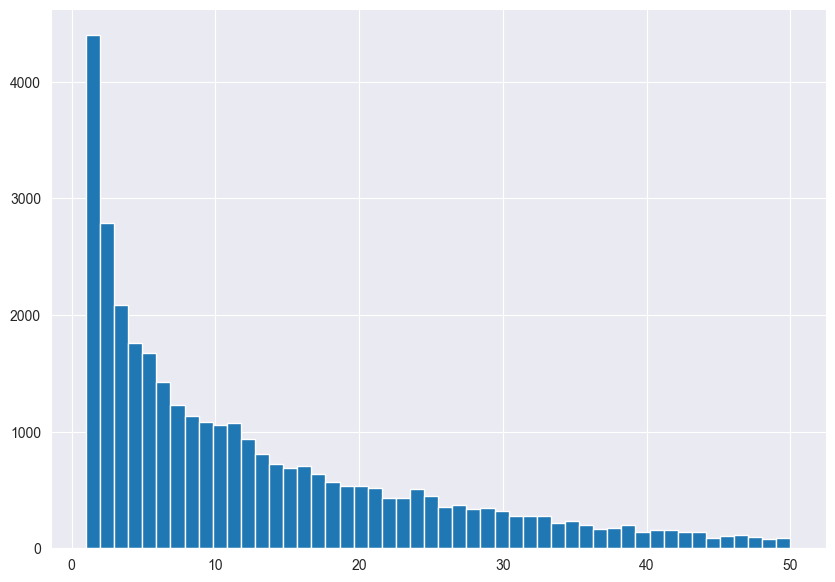

In [40]:
plt.figure(figsize=(10,7))
plt.hist(testdfff[testdfff['answer_length']<= 50]['answer_length'],bins=50)



In [180]:
# analyze the correct rate in each order
def correct_rate(seqs:list[list]):
    print(len(seqs))
    output = []
    print([len(seq) for seq in seqs])
    _maxlen = max(([len(seq) for seq in seqs]))
    for idx in range(_maxlen):
        temp = []
        for seq in seqs:
            if len(seq) > idx:
                temp.append(seq[idx])
        output.append(temp)
    mean = [statistics.mean(seq) for seq in output]
    se = [statistics.pstdev(seq) if len(seq) > 1 else 0 for seq in output ]
    n = [len(seq)  for seq in output ]

    return [mean,se,n]



exp_labels = testdfff['experiment_mode'].unique()
exp_labels.sort()

dfs = dict()
for lab in exp_labels:
    mask1 = testdfff['experiment_mode'] == lab
    mask2 = 10 > testdfff['answer_length']
    mask3 = 0 < testdfff['answer_length']
    mask = mask1 & mask2 & mask3
    dfs[lab] = testdfff[mask]

correct_rate = [correct_rate(dfs[key]['is_correct'].to_list()) for key in exp_labels[:-1]]
correct_rate_mean = [_[0] for _ in correct_rate]
correct_rate_se = [_[1] for _ in correct_rate]
correct_rate_sample_size =  [_[2] for _ in correct_rate]


1162
[1, 5, 3, 4, 3, 4, 1, 4, 6, 9, 3, 2, 1, 3, 5, 4, 8, 7, 1, 4, 6, 5, 1, 1, 6, 1, 2, 8, 2, 5, 4, 6, 5, 4, 1, 6, 1, 1, 2, 6, 9, 3, 2, 3, 4, 1, 1, 1, 3, 7, 1, 1, 9, 5, 1, 1, 8, 3, 1, 4, 1, 1, 5, 1, 6, 4, 2, 1, 5, 1, 3, 1, 6, 1, 5, 8, 3, 7, 4, 7, 3, 1, 7, 8, 6, 3, 1, 6, 9, 1, 1, 1, 1, 4, 5, 1, 5, 6, 1, 3, 7, 1, 2, 5, 1, 8, 7, 2, 8, 6, 1, 4, 1, 1, 3, 8, 2, 6, 4, 7, 2, 2, 2, 7, 6, 4, 3, 3, 6, 2, 2, 1, 4, 7, 2, 2, 7, 2, 8, 4, 5, 3, 9, 2, 1, 2, 1, 8, 2, 1, 1, 7, 6, 4, 3, 1, 1, 1, 6, 5, 3, 2, 1, 7, 8, 9, 1, 3, 2, 2, 1, 2, 2, 9, 5, 6, 8, 1, 1, 5, 3, 7, 1, 1, 2, 2, 4, 1, 6, 1, 1, 2, 7, 1, 4, 2, 1, 4, 5, 3, 8, 1, 1, 1, 7, 5, 5, 2, 4, 9, 2, 6, 2, 3, 3, 2, 1, 3, 3, 3, 1, 3, 1, 1, 2, 9, 1, 1, 1, 3, 5, 3, 5, 2, 7, 6, 1, 2, 3, 1, 8, 9, 4, 4, 9, 2, 7, 2, 1, 2, 7, 4, 9, 2, 1, 4, 1, 4, 5, 1, 1, 1, 2, 3, 4, 1, 2, 7, 7, 5, 1, 8, 5, 4, 1, 2, 1, 4, 1, 1, 9, 1, 1, 3, 5, 1, 1, 3, 9, 2, 1, 3, 9, 4, 8, 1, 1, 3, 6, 3, 1, 1, 3, 2, 3, 5, 2, 1, 3, 4, 6, 1, 1, 1, 5, 1, 4, 5, 7, 6, 7, 1, 6, 1, 2, 1, 7, 1, 3, 7, 2, 4

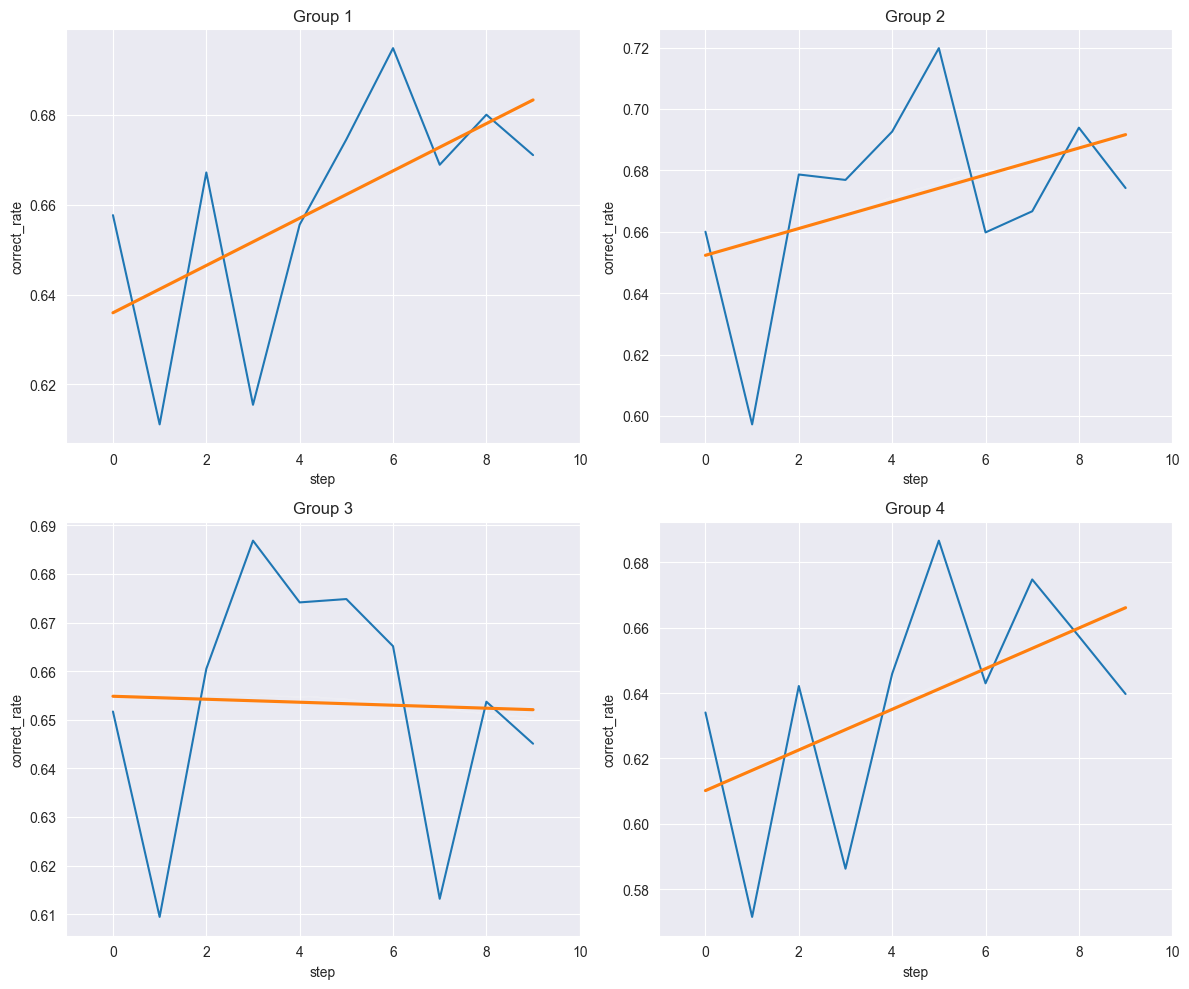

In [181]:
def plot_correct_rate_with_sd(correct_rate_seq, sd_seq=None, length_lim = None):
    plt.figure(figsize=(12, 10))  # 改為合理大小
    for i in range(4):
        length = len(correct_rate_seq[i]) if length_lim is None else length_lim
        df = pd.DataFrame({
            'step': range(length),
            'correct_rate': correct_rate_seq[i][:length]
        })
        if sd_seq is not None:
            df['sd'] = sd_seq[i][:length_lim]
            df['upper'] = df['correct_rate'] + df['sd']
            df['lower'] = df['correct_rate'] - df['sd']

        plt.subplot(2, 2, i + 1)
        sns.lineplot(data=df, x='step', y='correct_rate')
        sns.regplot(data=df, x='step', y='correct_rate',scatter= False,ci = False)
        if sd_seq is not None:
            plt.fill_between(df['step'], df['lower'], df['upper'], alpha=0.3)
        plt.xlim([-1, length_lim])
        plt.title(f"Group {i + 1}")

    plt.tight_layout()
    plt.show()

# 僅畫線

#plot_correct_rate_with_sd(correct_rate_seq, sd_seq=correct_rate_se, length_lim=20)

plot_correct_rate_with_sd(correct_rate_seq,length_lim=10)


In [175]:
draw_df = pd.DataFrame({
    'step' : range(100),
    'n': correct_rate_sample_size[1][:100]
})
sns.lineplot(data = draw_df, x = 'step', y = 'n')


ValueError: All arrays must be of the same length